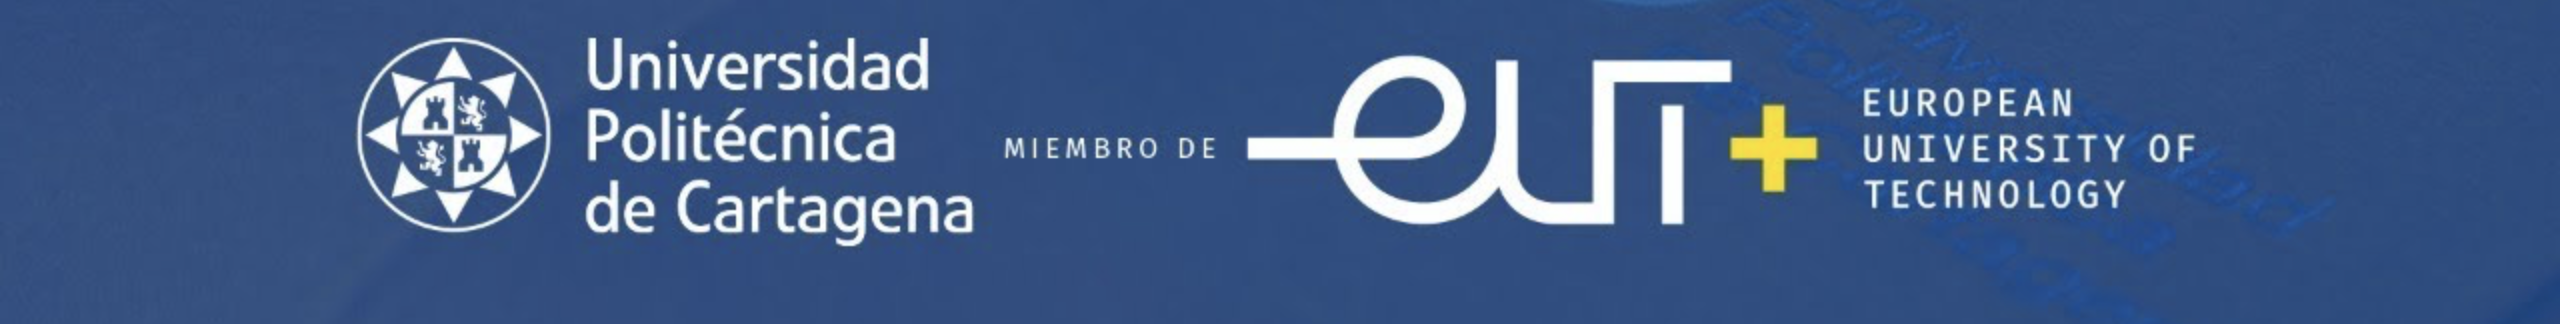

**MACHINE LEARNING II**

# PRÁCTICA 5. PREPARACION DE DATOS


Los objetivos de aprendizaje de esta práctica son:
1. Entender en la práctica las principales tareas de la preparación de datos.
2. Utilización de una librería específica para desarrollas dicha tarea.
3. Toma de decisiones sobre el uso de distintas técnicas.

El objetivo de la preparación de datos es la obtención de un conjunto de datos que permita construir el mejor modelo de ML para resolver el problema.

##  0  EJEMPLO GUÍA

Deseamos construir un modelo de ML de clasificación binaria a partir de los datos provenientes de una base de datos cuyas variables de estudio son:

- **columA** : Identificación.
- **columB** : Nombre.
- **columC** : Edad.
- **columD** : Genero.
- **columE** : Edad.
- **columF** : Altura.
- **columG** : Peso.
- **columH** : MIC.
- **columI** : Presión sistólica.
- **columJ** : Presión diástólica.
- **columK** : Azucar en sangre.

Antes de poder trabajar con un modelo de ML de clasificación binaria  **tendremos que preparar los datos**.

# 1 - Librerías




Para trabajar con la prepraración de datos en Python utilizaremos las librerías
- Numpy para el manejo de arrays
- Pandas especialmente para usar dataframes
- Matplotlib: para gráficas
- Sklearn: para escalar valores.


In [37]:
# Importe las librerías y módulos necesarios

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Carga de datos

El primer paso es obtener el conjunto de datos que se desea analizar para comenzar su exploración.


In [38]:
# FUENTE DE DATOS: FICHERO CSV con separadores ';'
df = pd.read_csv('pacientes.csv',sep=';')
df.head(5)

,id,FullName,AGE(RAND),GENDER,AGE,HEIGHT,WEIGHT,MIC,PRESARTSIS,PRESARTDIAS,AZUCARSANGRE
0,A01,Pepe Vega,95,NaN,62.0,1.49,82,36.935273,110,84,125
1,A02,Juan Brown,37,1.0,NaN,1.46,90,42.221805,124,76,91
2,A03,Pepe Martinez,32,1.0,44.0,1.69,71,24.859074,112,84,125
3,A04,Emma Smith,95,NaN,72.0,1.58,77,30.844416,112,75,122
4,A05,David McFlurry,53,1.0,72.0,1.53,71,30.330215,110,75,102


## 1.2 Eliminación de columnas irrelevantes

En el conjunto de datos hay variables (columnas) irrelevantes en nuestro problema.

* `drop(indexId, axis)` elimina filas (axis=0) y columnas (axis=1) a partir del index.


In [39]:
# Irrelevantes "id " y "FullName"
# "id" las establecemos como index.
# Eliminaremos  "FullName"

#df = df.drop('id', axis=1)
df = df.set_index('id')
df = df.drop('FullName', axis=1)

df.head(5)

,AGE(RAND),GENDER,AGE,HEIGHT,WEIGHT,MIC,PRESARTSIS,PRESARTDIAS,AZUCARSANGRE
id,,,,,,,,,
A01,95,NaN,62.0,1.49,82,36.935273,110,84,125
A02,37,1.0,NaN,1.46,90,42.221805,124,76,91
A03,32,1.0,44.0,1.69,71,24.859074,112,84,125
A04,95,NaN,72.0,1.58,77,30.844416,112,75,122
A05,53,1.0,72.0,1.53,71,30.330215,110,75,102


# 2 - Valores faltantes

## 2.1 Identificación de valores faltantes

El **dataframe** de Pandas, incluye diferentes funciones para identificar valores faltantes.


*   `info()` resumen la base de datos, indicando los valores faltantes.
*   `isnull().sum()` cuenta los valores fantantes de cada columna

In [40]:
# Resumen del df. Non-Null count nos muestra qué variables tienen datos faltantes.
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, A01 to A100
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE(RAND)     100 non-null    int64  
 1   GENDER        86 non-null     float64
 2   AGE           97 non-null     float64
 3   HEIGHT        100 non-null    float64
 4   WEIGHT        100 non-null    int64  
 5   MIC           100 non-null    float64
 6   PRESARTSIS    100 non-null    int64  
 7   PRESARTDIAS   100 non-null    int64  
 8   AZUCARSANGRE  100 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 7.8+ KB


In [41]:
# Valores faltantes por cada columna
df.isnull().sum()

# y valores faltantes en total
#df.isnull().sum().sum()

AGE(RAND)        0
GENDER          14
AGE              3
HEIGHT           0
WEIGHT           0
MIC              0
PRESARTSIS       0
PRESARTDIAS      0
AZUCARSANGRE     0
dtype: int64

## 2.2 Imputación de valores faltantes

En dataframe se pueden imputar valores faltantes con `fillna()`:
* Imputar con un valor fijo `df.fillna(0, inplace=True)`
* Imputar con un estadístico mean/median con `df['column_name'].fillna(df['column_name'].mean(), inplace=True)`
* Imputar con un valor concreto de otra fila (method ffill o bfill).
`df.fillna(method='bfill', inplace=True)`


En el ejemplo Gender y Age tienen valores faltantes:
* Age podría imputarse con la media
* Gender no podría imputarse con media: bfill, ffill.


In [42]:
# Mostramos los datos
df.head(20)

,AGE(RAND),GENDER,AGE,HEIGHT,WEIGHT,MIC,PRESARTSIS,PRESARTDIAS,AZUCARSANGRE
id,,,,,,,,,
A01,95,NaN,62.0,1.49,82,36.935273,110,84,125
A02,37,1.0,NaN,1.46,90,42.221805,124,76,91
A03,32,1.0,44.0,1.69,71,24.859074,112,84,125
A04,95,NaN,72.0,1.58,77,30.844416,112,75,122
A05,53,1.0,72.0,1.53,71,30.330215,110,75,102
A06,28,0.0,NaN,1.58,64,25.636917,122,75,101
A07,50,NaN,27.0,1.54,78,32.889189,117,83,119
A08,83,1.0,27.0,1.66,58,21.048048,114,76,120
A09,69,0.0,NaN,1.70,91,31.487889,126,84,106


In [43]:
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['GENDER'].fillna(method='ffill', inplace=True)
df.head(20)

C:\Users\Antonio\AppData\Local\Temp\ipykernel_17552\445468685.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AGE'].fillna(df['AGE'].mean(), inplace=True)
C:\Users\Antonio\AppData\Local\Temp\ipykernel_17552\445468685.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,AGE(RAND),GENDER,AGE,HEIGHT,WEIGHT,MIC,PRESARTSIS,PRESARTDIAS,AZUCARSANGRE
id,,,,,,,,,
A01,95,NaN,62.000000,1.49,82,36.935273,110,84,125
A02,37,1.0,53.731959,1.46,90,42.221805,124,76,91
A03,32,1.0,44.000000,1.69,71,24.859074,112,84,125
A04,95,1.0,72.000000,1.58,77,30.844416,112,75,122
A05,53,1.0,72.000000,1.53,71,30.330215,110,75,102
A06,28,0.0,53.731959,1.58,64,25.636917,122,75,101
A07,50,0.0,27.000000,1.54,78,32.889189,117,83,119
A08,83,1.0,27.000000,1.66,58,21.048048,114,76,120
A09,69,0.0,53.731959,1.70,91,31.487889,126,84,106


❓ ¿Por qué queda la primera linea (A01) sin imputar en GENDER cuando utilizamos `ffill`?

# 3 - Información redundante
Algunas filas y columnas pueden contener información redundante.

* Datos idénticos: hay filas/columnas repetidas donde los datos están replicados.
* Información redundante: hay columnas que conceptualmente representan la misma información (ej. año de nacimiento y edad).



Identificación de redundancia:

* De forma manual: revisar la metainformación y nombre de las cabeceras.
* Automática: `duplicated()` encuentra filas duplicadas. `.T.duplicated()` para columnas.

❗ Las columnas redundantes suelen ser eliminadas. Pero las filas redundantes podrían llegar a mantenerse (individuos con los mismo datos).

In [44]:
# HACEMOS UNA COPIA DE LA COLUMNA 'MIC' para ejemplo.

df['MICcopia']= df['MIC'].copy()


# COMPROBAMOS CON DUPLICATE filas y columnas

fila_redundante = df.duplicated()
print('Filas redundantes:', fila_redundante)

col_redundantes = df.T.duplicated()
print('Columnas redundantes',col_redundantes)



Filas redundantes: id
A01     False
A02     False
A03     False
A04     False
A05     False
        ...  
A96     False
A97     False
A98     False
A99     False
A100    False
Length: 100, dtype: bool
Columnas redundantes AGE(RAND)       False
GENDER          False
AGE             False
HEIGHT          False
WEIGHT          False
MIC             False
PRESARTSIS      False
PRESARTDIAS     False
AZUCARSANGRE    False
MICcopia         True
dtype: bool


# 4 - Valores atípicos (outliers)

## 4.1 Los outliers ¿son 'legítimos' o han sido un error al introducir los datos?.

Estas cuestión depende del tipo de problema y los valores registrados.

## 4.2 Detección de outliers
* Identificación visual de outliers (boxplot): una forma rápida.
* Método estadístico: Z-score: ¿Cuántas desviaciones estándar tiene un punto de datos de la media?
* Método estadístico: IQR: rango entre cuartil 1 y 3. Medida de dispersión robusta.

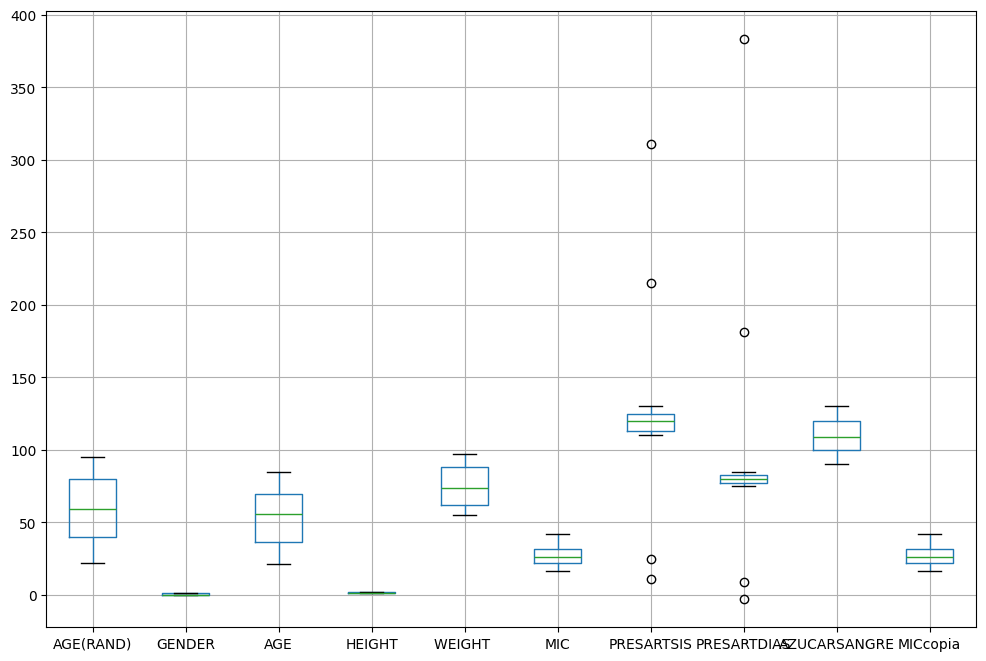

In [45]:
# DETECCIÓN

# BOXPLOT para OUTLAYERS
#import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
df.boxplot()
plt.show()



In [ ]:
# DETECCIÓN

# Z-SCORE Z=3  PRESION ARTERIAL SISTOLICA

# Para 1 columna: media/sdt/z_scores
mean = df['PRESARTSIS'].mean()
std = df['PRESARTSIS'].std()
z_scores = (df['PRESARTSIS'] - mean) / std

# Definir el umbral (ej |z| > 3)
outliers = df[np.abs(z_scores) > 3]
outliers


,AGE(RAND),GENDER,AGE,HEIGHT,WEIGHT,MIC,PRESARTSIS,PRESARTDIAS,AZUCARSANGRE,MICcopia
id,,,,,,,,,,
A17,30,0.0,65.0,1.67,59,21.155294,215,78,97,21.155294
A23,88,0.0,43.0,1.77,80,25.535446,311,80,109,25.535446
A38,57,0.0,40.0,1.87,64,18.301925,11,84,106,18.301925
A95,36,0.0,31.0,1.57,94,38.135421,25,383,118,38.135421


In [49]:
# Z-SCORE Z=3 PRESION ARTERIAL DIASTOLICA

# Para 1 columna: media/sdt/z_scores
mean = df['PRESARTDIAS'].mean()
std = df['PRESARTDIAS'].std()
z_scores = (df['PRESARTDIAS'] - mean) / std

# Definir el umbral (ej |z| > 3)
outliers = df[np.abs(z_scores) > 3]
outliers

,AGE(RAND),GENDER,AGE,HEIGHT,WEIGHT,MIC,PRESARTSIS,PRESARTDIAS,AZUCARSANGRE,MICcopia
id,,,,,,,,,,
A95,36,0.0,31.0,1.57,94,38.135421,25,383,118,38.135421


⚠ Observa los outliyers de PRESARTSIS
* fila A17 tienen un valor **posible**
* el resto de outliers tienen valores no posibles. A23,A38,A95


⚠ Observa los outliers de PRESARTDIAS
* fila A36 tiene un valor no posible.


❓ ¿Hay algún valor no posible que no sea outlier?


In [50]:
#La fila A23 tienen una presión sistólica imposible
df.loc['A23']

AGE(RAND)        88.000000
GENDER            0.000000
AGE              43.000000
HEIGHT            1.770000
WEIGHT           80.000000
MIC              25.535446
PRESARTSIS      311.000000
PRESARTDIAS      80.000000
AZUCARSANGRE    109.000000
MICcopia         25.535446
Name: A23, dtype: float64

## 4.2 Tratamiento de Outliers

* Eliminación. `drop(index)`
* Imputación: sustitución por un valor
  - Estadístico: mínimo, media, mediana, máximo,etc.
  - Transformación del dato: log, raiz cuadrada, etc.


In [51]:
#ELIMINACION

# Eliminamos la fila A23
df_sinA23 = df.drop('A23')

df_sinA23.head(25)

,AGE(RAND),GENDER,AGE,HEIGHT,WEIGHT,MIC,PRESARTSIS,PRESARTDIAS,AZUCARSANGRE,MICcopia
id,,,,,,,,,,
A01,95,NaN,62.000000,1.49,82,36.935273,110,84,125,36.935273
A02,37,1.0,53.731959,1.46,90,42.221805,124,76,91,42.221805
A03,32,1.0,44.000000,1.69,71,24.859074,112,84,125,24.859074
A04,95,1.0,72.000000,1.58,77,30.844416,112,75,122,30.844416
A05,53,1.0,72.000000,1.53,71,30.330215,110,75,102,30.330215
A06,28,0.0,53.731959,1.58,64,25.636917,122,75,101,25.636917
A07,50,0.0,27.000000,1.54,78,32.889189,117,83,119,32.889189
A08,83,1.0,27.000000,1.66,58,21.048048,114,76,120,21.048048
A09,69,0.0,53.731959,1.70,91,31.487889,126,84,106,31.487889


# 5 - Normalización y estandarización

Transformar los datos numéricos escalándolos con el propósito de mejorar la convergencia de los modelos ML

## 5.1 Normalización Min Max
Normalización MinMax $x_{norm} = \frac{x-min(x)}{max(x)-min(x)}$.

  - pasar a rangos [0,1] o [-1,1].
  - para datos con distribuciones no gaussianas o desconocidas.
  - sensible a outliers.
  - `MinMaxScaler()` de librería `sklearn`

In [52]:
from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
datos_escalado = normalizador.fit_transform(df) # datos_escala  es un NumPy array.

df_escalado = pd.DataFrame(datos_escalado, columns=df.columns, index=df.index)

df_escalado.head()

,AGE(RAND),GENDER,AGE,HEIGHT,WEIGHT,MIC,PRESARTSIS,PRESARTDIAS,AZUCARSANGRE,MICcopia
id,,,,,,,,,,
A01,1.000000,NaN,0.640625,0.088889,0.642857,0.796945,0.330000,0.225389,0.875,0.796945
A02,0.205479,1.0,0.511437,0.022222,0.833333,1.000000,0.376667,0.204663,0.025,1.000000
A03,0.136986,1.0,0.359375,0.533333,0.380952,0.333099,0.336667,0.225389,0.875,0.333099
A04,1.000000,1.0,0.796875,0.288889,0.523810,0.562996,0.336667,0.202073,0.800,0.562996
A05,0.424658,1.0,0.796875,0.177778,0.380952,0.543245,0.330000,0.202073,0.300,0.543245


## 5.2 Estandarización

Estandarización $x_{std} = \frac{x-\mu}{δ}$ siendo $\mu$ media y $\delta$ desv. estándar.

  - centrar valores con media 0 y desv.est. 1.
  - rangos de negativos a positivos
  - para distribuciones de datos gaussianos.
  - robusto ante outliers.
  - `StandardScaler()` de la librería `sklearn`


In [53]:
from sklearn.preprocessing import StandardScaler

estandardizador = StandardScaler()
datos_estandarizados = estandardizador.fit_transform(df) # datos_escala  es un NumPy array.

df_estandarizado = pd.DataFrame(datos_estandarizados, columns=df.columns, index=df.index)

df_estandarizado.head()

,AGE(RAND),GENDER,AGE,HEIGHT,WEIGHT,MIC,PRESARTSIS,PRESARTDIAS,AZUCARSANGRE,MICcopia
id,,,,,,,,,,
A01,1.608124,NaN,4.434236e-01,-1.306993,0.558855,1.495776,-0.383013,0.042910,1.324496,1.495776
A02,-1.004515,1.010153,-3.810714e-16,-1.520206,1.158163,2.303251,0.144761,-0.193836,-1.580850,2.303251
A03,-1.229742,1.010153,-5.219350e-01,0.114424,-0.265194,-0.348764,-0.307617,0.042910,1.324496,-0.348764
A04,1.608124,1.010153,9.797340e-01,-0.667355,0.184287,0.565448,-0.307617,-0.223429,1.068142,0.565448
A05,-0.283787,1.010153,9.797340e-01,-1.022710,-0.265194,0.486908,-0.383013,-0.223429,-0.640885,0.486908


# 6 - Numéricos vs. Categóricos

## 6.1 Transormación categórico a numérico

El **one-hot encoding** convierte datos categóricos en una representación numérica.  Transforma cada categoría en una columna binaria. Así para una columna con  3 categorías, ahora habrá tres columnas binarias.


`get_dummies()` de la librería `pandas`.

In [54]:
#PARA EL EJEMPLO AÑADIMOS UNA NUEVA COLUMA CON DATOS ALEATORIOS CATEGÓRICOS

df['STATE']= np.random.choice(['rojo', 'naranja', 'amarillo', 'verde'], size=len(df))

df.head()

,AGE(RAND),GENDER,AGE,HEIGHT,WEIGHT,MIC,PRESARTSIS,PRESARTDIAS,AZUCARSANGRE,MICcopia,STATE
id,,,,,,,,,,,
A01,95,NaN,62.000000,1.49,82,36.935273,110,84,125,36.935273,amarillo
A02,37,1.0,53.731959,1.46,90,42.221805,124,76,91,42.221805,rojo
A03,32,1.0,44.000000,1.69,71,24.859074,112,84,125,24.859074,amarillo
A04,95,1.0,72.000000,1.58,77,30.844416,112,75,122,30.844416,verde
A05,53,1.0,72.000000,1.53,71,30.330215,110,75,102,30.330215,verde


In [55]:
#ONE HOT ENCODING DE COLUMNA 'STATE'

one_hot = pd.get_dummies(df['STATE'])
one_hot

df = pd.concat([df, one_hot], axis=1)
df.head()

,AGE(RAND),GENDER,AGE,HEIGHT,WEIGHT,MIC,PRESARTSIS,PRESARTDIAS,AZUCARSANGRE,MICcopia,STATE,amarillo,naranja,rojo,verde
id,,,,,,,,,,,,,,,
A01,95,NaN,62.000000,1.49,82,36.935273,110,84,125,36.935273,amarillo,True,False,False,False
A02,37,1.0,53.731959,1.46,90,42.221805,124,76,91,42.221805,rojo,False,False,True,False
A03,32,1.0,44.000000,1.69,71,24.859074,112,84,125,24.859074,amarillo,True,False,False,False
A04,95,1.0,72.000000,1.58,77,30.844416,112,75,122,30.844416,verde,False,False,False,True
A05,53,1.0,72.000000,1.53,71,30.330215,110,75,102,30.330215,verde,False,False,False,True


# 7 - Ejercicio

Con lo realizado en la práctica obtenga un archivo de la siguiente base de datos y trate los datos de la manera expuesta.

https://archive.ics.uci.edu/datasets